### Credit Risk Exploratory Data Analysis
### EDA Assignment ineuron 
### Date: 09/10/21
### Name : Jugal Deshmukh

### Dataset Info : application_data.csv

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading the application dataset first
credit_data = pd.read_csv('application_data.csv')

In [3]:
credit_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
credit_data.shape

(307511, 122)

In [5]:
credit_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
# Checking the data types of all the columns
credit_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [7]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
# Check the descriptive statistics of numeric variables
credit_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


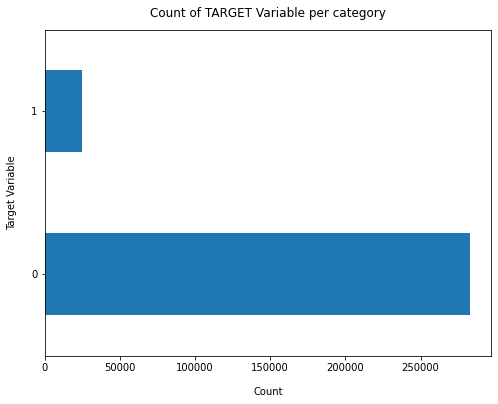

In [9]:
credit_data['TARGET'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [10]:
credit_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [11]:
100*credit_data['TARGET'].value_counts()/len(credit_data['TARGET'])

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

#### Data is highly imbalanced with a ratio of 91.9 %

In [12]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
credit_data.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [13]:
# check for missing values in the dataset
credit_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

C:\Anaconda\envs\rstudio\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


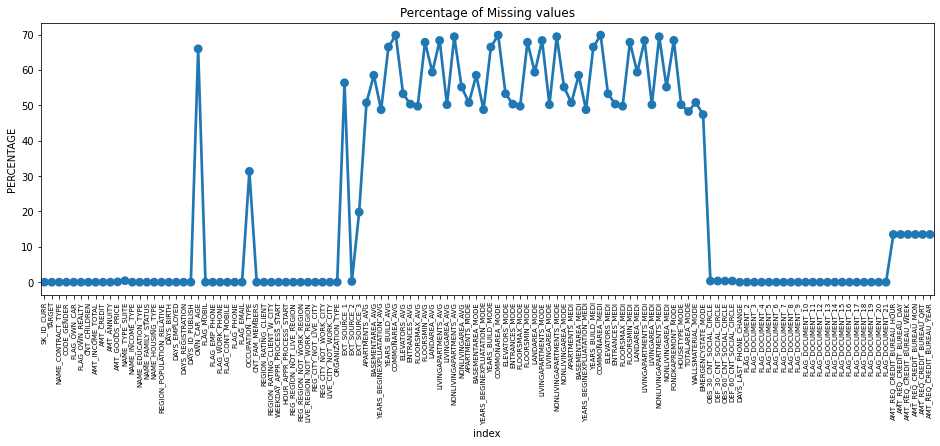

In [14]:
missing = pd.DataFrame((credit_data.isnull().sum())*100/credit_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [15]:
# There are a lot of missing values in many columns of the dataset
credit_data.dropna(how = 'any', inplace = True)

In [16]:
#drop unnecessary columns from the dataset
cred_data = credit_data.drop([
    'OWN_CAR_AGE',
    'APARTMENTS_AVG',
    'BASEMENTAREA_AVG',
    'YEARS_BEGINEXPLUATATION_AVG',
    'YEARS_BUILD_AVG',
    'COMMONAREA_AVG',
    'ELEVATORS_AVG',
    'ENTRANCES_AVG',
    'FLOORSMAX_AVG',
    'FLOORSMIN_AVG',
    'LANDAREA_AVG',
    'LIVINGAPARTMENTS_AVG',
    'LIVINGAREA_AVG',
    'NONLIVINGAPARTMENTS_AVG',
    'NONLIVINGAREA_AVG',
    'APARTMENTS_MODE',
    'BASEMENTAREA_MODE',
    'YEARS_BEGINEXPLUATATION_MODE',
    'YEARS_BUILD_MODE',
    'COMMONAREA_MODE',
    'ELEVATORS_MODE',
    'ENTRANCES_MODE',
    'FLOORSMAX_MODE',
    'FLOORSMIN_MODE',
    'LANDAREA_MODE',
    'LIVINGAPARTMENTS_MODE',
    'LIVINGAREA_MODE',
    'NONLIVINGAPARTMENTS_MODE',
    'NONLIVINGAREA_MODE',
    'APARTMENTS_MEDI',
    'BASEMENTAREA_MEDI',
    'YEARS_BEGINEXPLUATATION_MEDI',
    'YEARS_BUILD_MEDI',
    'COMMONAREA_MEDI',
    'ELEVATORS_MEDI',
    'ENTRANCES_MEDI',
    'FLOORSMAX_MEDI',
    'FLOORSMIN_MEDI',
    'LANDAREA_MEDI',
    'LIVINGAPARTMENTS_MEDI',
    'LIVINGAREA_MEDI',
    'NONLIVINGAPARTMENTS_MEDI',
    'NONLIVINGAREA_MEDI',
    'FONDKAPREMONT_MODE',
    'HOUSETYPE_MODE',
    'TOTALAREA_MODE',
    'WALLSMATERIAL_MODE',
    'EMERGENCYSTATE_MODE'
], axis=1)

In [17]:
# check for missing values in the dataset
cred_data.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 74, dtype: int64

In [18]:
cred_data.shape

(8602, 74)

C:\Anaconda\envs\rstudio\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


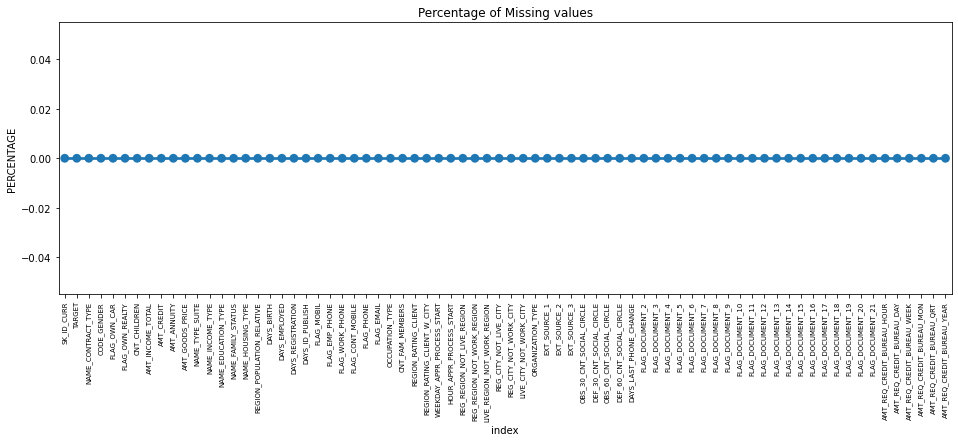

In [19]:
# Now there are no missing values in the dataset cred_data
missing = pd.DataFrame((cred_data.isnull().sum())*100/cred_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### As you can see there are no missing values in the latest dataset as we have dropped the columns having high percentage of missing values

### Data Cleaning

1. create a copy of the latest dataset cred_data for manipulation and processing

In [20]:
cred_data2 = cred_data.copy()

2. Check for null values in cred_data2

In [21]:
cred_data2.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 74, dtype: int64

In [22]:
cred_data2.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CI

In [23]:
cred_data2.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
296,100341,0,Cash loans,M,Y,Y,0,76500.0,545040.0,20677.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
298,100343,0,Cash loans,M,Y,Y,0,315000.0,90000.0,4504.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
316,100363,0,Cash loans,F,Y,Y,1,360000.0,493497.0,48942.0,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0
323,100371,0,Cash loans,F,Y,Y,1,450000.0,808650.0,31464.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
328,100376,0,Cash loans,M,Y,Y,0,360000.0,254700.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


### Univariate Analysis

In [24]:
# Describing the Gender column to check the number of females and males in the dataset

cred_data2['CODE_GENDER'].value_counts()

M    4381
F    4221
Name: CODE_GENDER, dtype: int64

#### Percentage wise it is 50-50. The amount of males are a little more than females in the dataset  

In [25]:
# Describing the organization type column

cred_data2['ORGANIZATION_TYPE'].describe()

count                       8602
unique                        55
top       Business Entity Type 3
freq                        2607
Name: ORGANIZATION_TYPE, dtype: object

In [26]:
# Casting all variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

cred_data2[numeric_columns]=cred_data2[numeric_columns].apply(pd.to_numeric)
cred_data2.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0


### Derived Metrics

Now, Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [27]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

cred_data2['AMT_INCOME_RANGE']=pd.cut(cred_data2['AMT_INCOME_TOTAL'],bins,labels=slot)

In [28]:

# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

cred_data2['AMT_CREDIT_RANGE']=pd.cut(cred_data2['AMT_CREDIT'],bins=bins,labels=slots)

In [29]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0_data=cred_data2.loc[cred_data2["TARGET"]==0]
target1_data=cred_data2.loc[cred_data2["TARGET"]==1]

In [30]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

round(len(target0_data)/len(target1_data),2)

15.35

The data imbalance percentage is 15.35%

The dataset is highly imbalanced

### Univariate analysis for categories

#### Now, doing Categorical Univariate Analysis in logarithmic scale for target=0(client with no payment difficulties)

In [56]:
# Count plotting in logarithmic scale

def uniplot(cred_data2,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(cred_data2[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = cred_data2, x= col, order=cred_data2[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

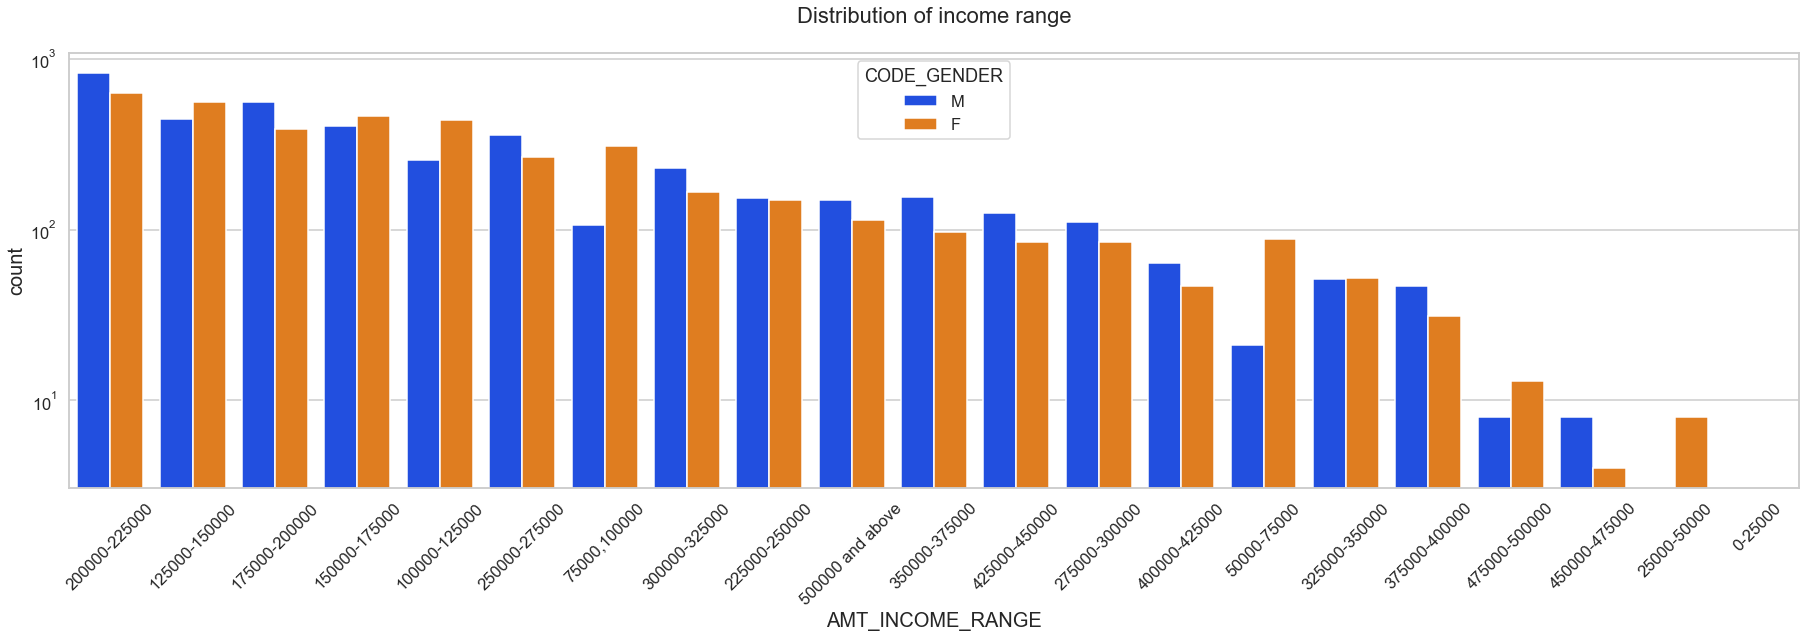

In [32]:
# PLotting for income range

uniplot(target0_data,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

Points to be concluded from the above graph.

1. Male and female count is almost equal in number.
2. Income range from 100000 to 225000 is having the most number of credits.
3. This graph show that both males and females are having almost equal number of credits.
4. Very less count for income range 450000 - 500000 and above.

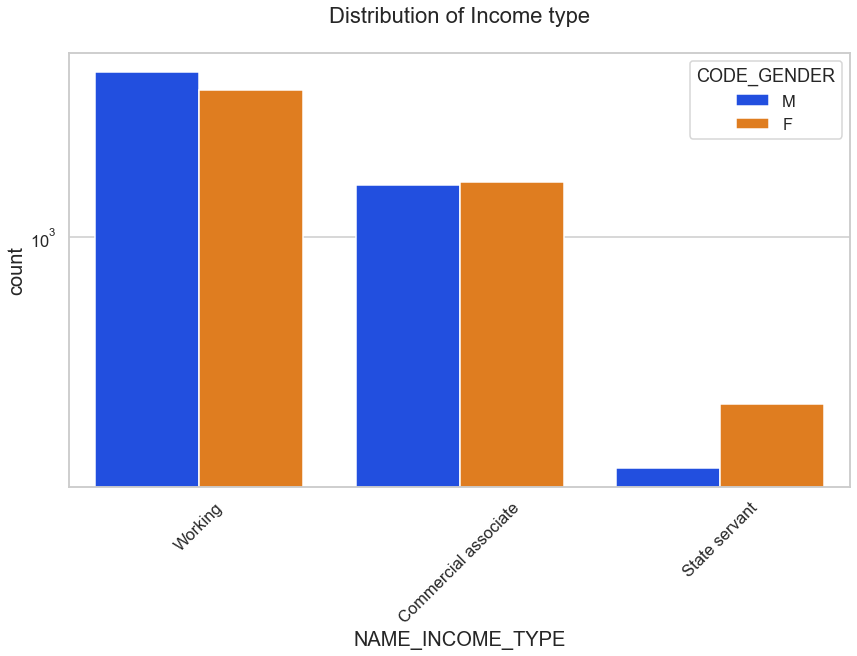

In [33]:
# Plotting for Income type

uniplot(target0_data,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')


Points to be concluded from the above graph.

1. The higher number of credits is for income type 'Working'. 
2. For income type ‘Working’, ’Commercial associate’, the number of credits are higher than ‘State Servant.
3. For this Females are having more number of credits than male.
4. Here the lowest number of credits is for the income type 'State Servant'

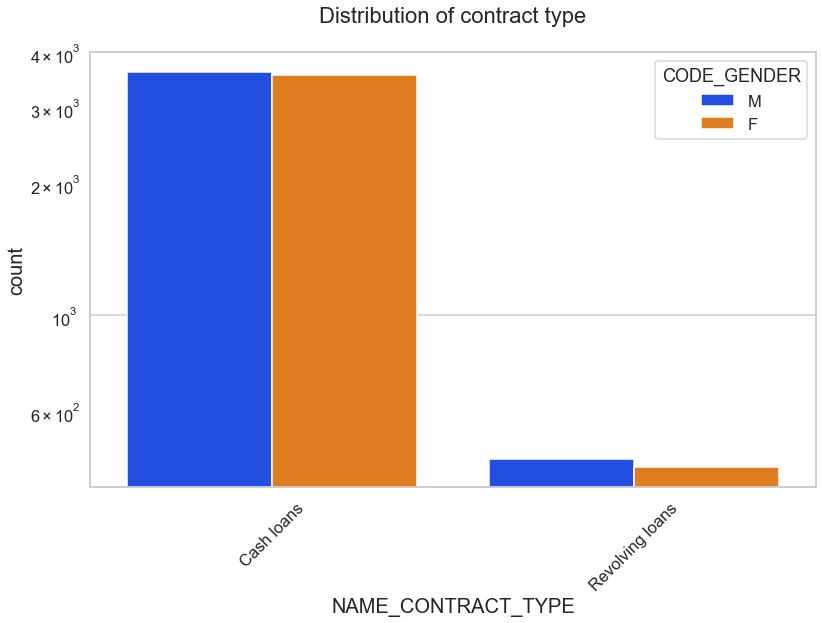

In [34]:
# Plotting for Contract type

uniplot(target0_data,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')


Points to be concluded from the above graph.

1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. Here the males and females both are having almost equal number of credits for contract type.

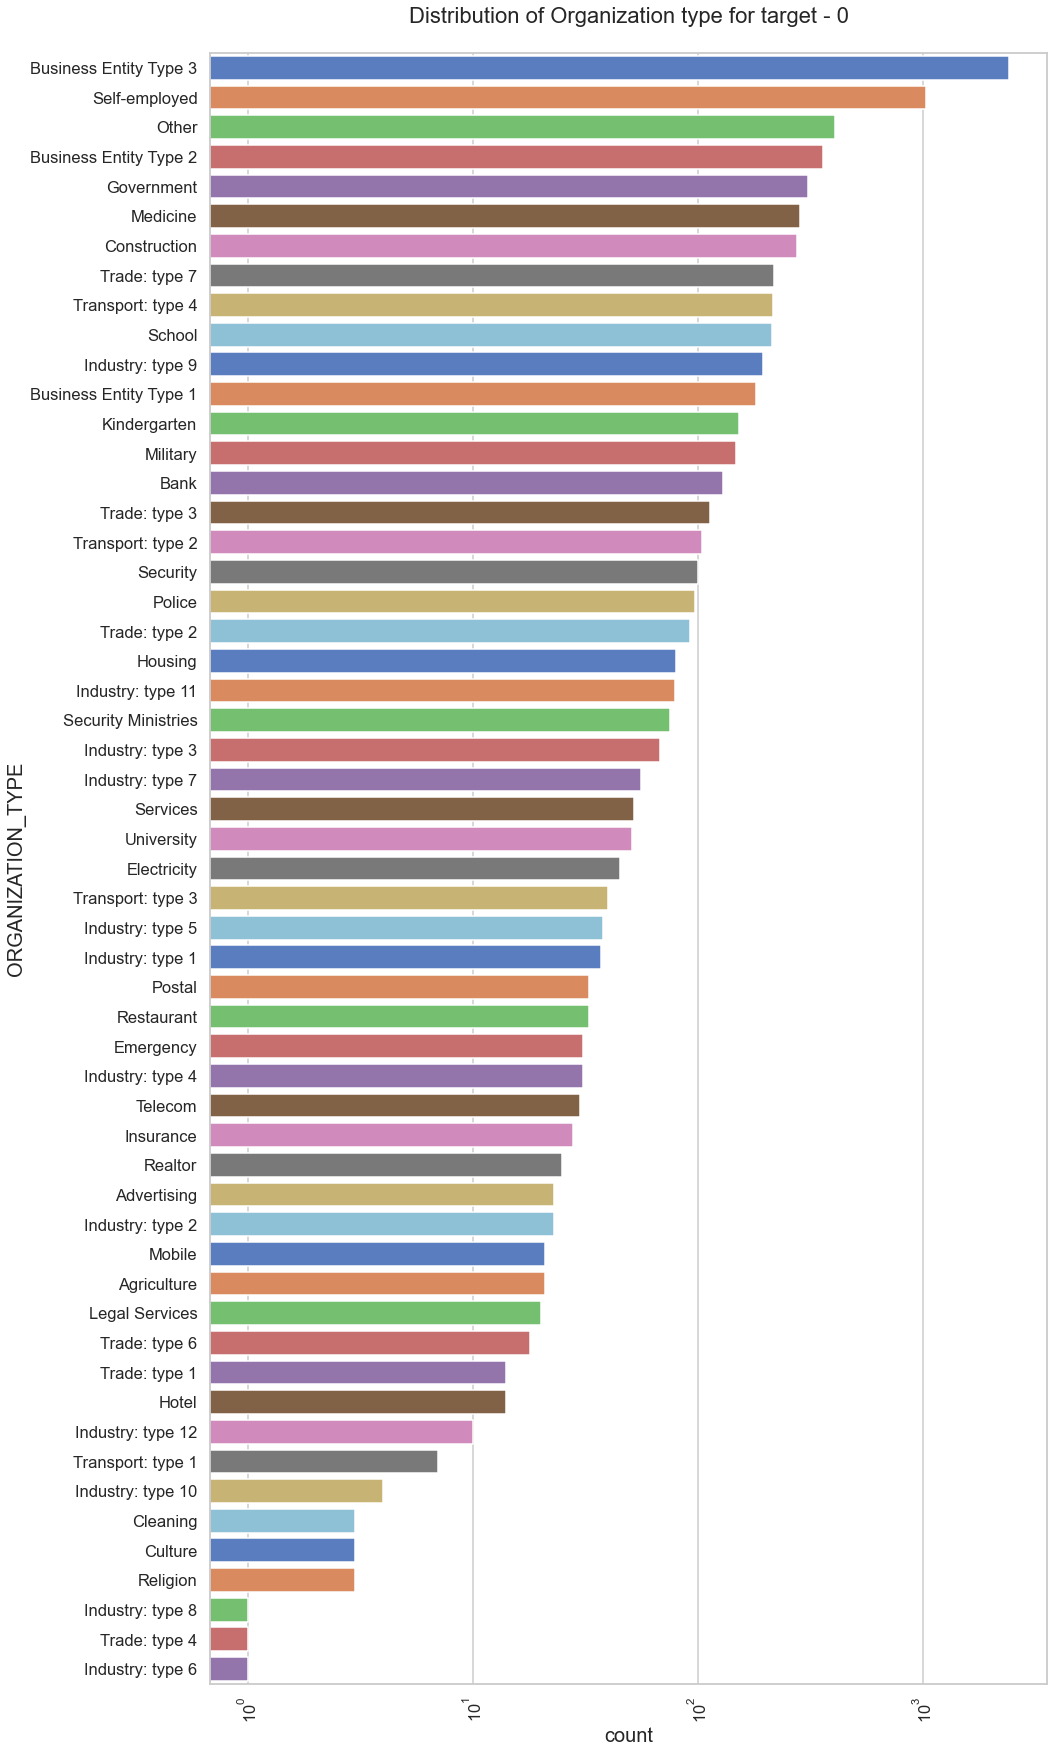

In [35]:
# Plotting for Organization type in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_data,y='ORGANIZATION_TYPE',order=target0_data['ORGANIZATION_TYPE'].value_counts().index,palette='muted')

plt.show()


Points to be concluded from the above graph.

1. Clients which have applied for credits are from most of the organization type 'Business entity Type 3’ , ‘Self employed’, ‘Other’ , Business entity Type 2’,‘Medicine’ and ‘Government’.
2. Less clients are from Industry Culture, Religion, Industry type 6, Trade type 4 and Industry type 8

#### Now, doing Categorical Univariate Analysis in logarithmic scale for target=1(client with payment difficulties)

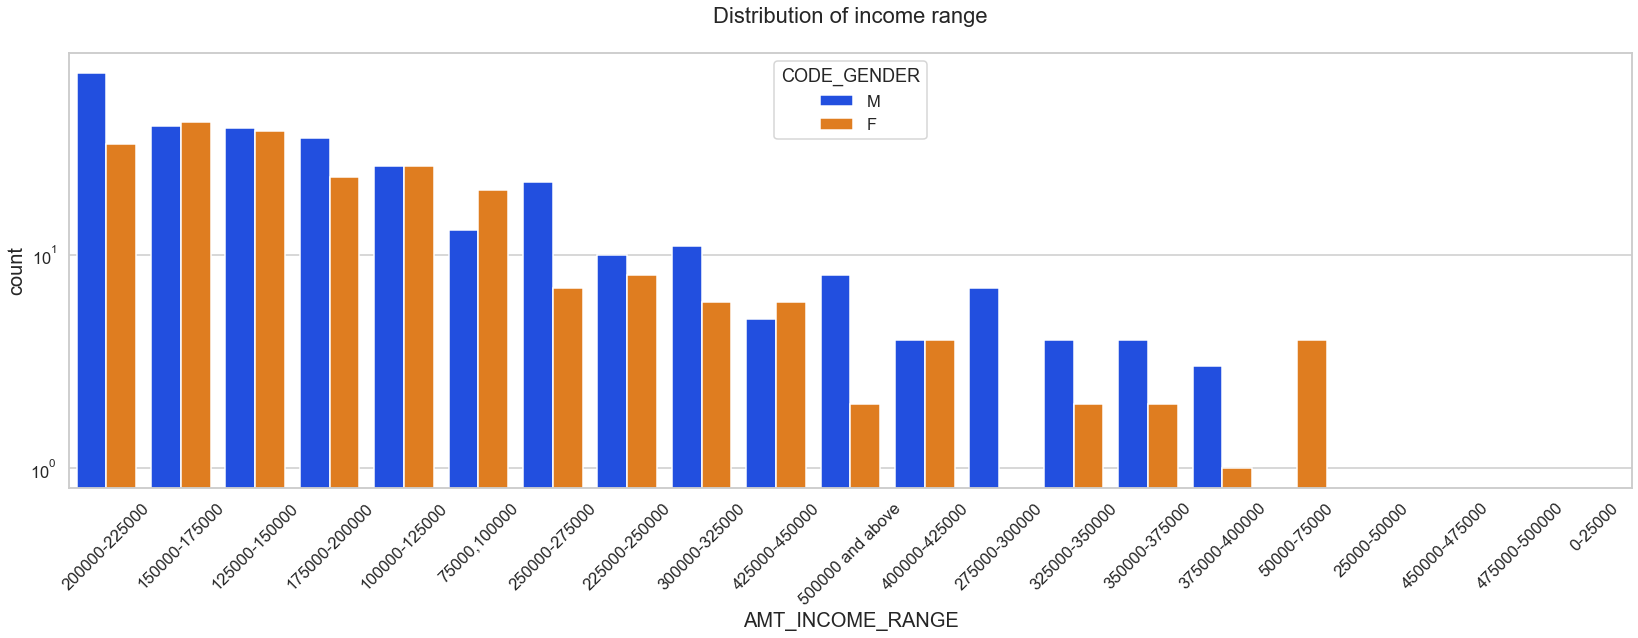

In [36]:
# PLotting for income range for target1

uniplot(target1_data,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

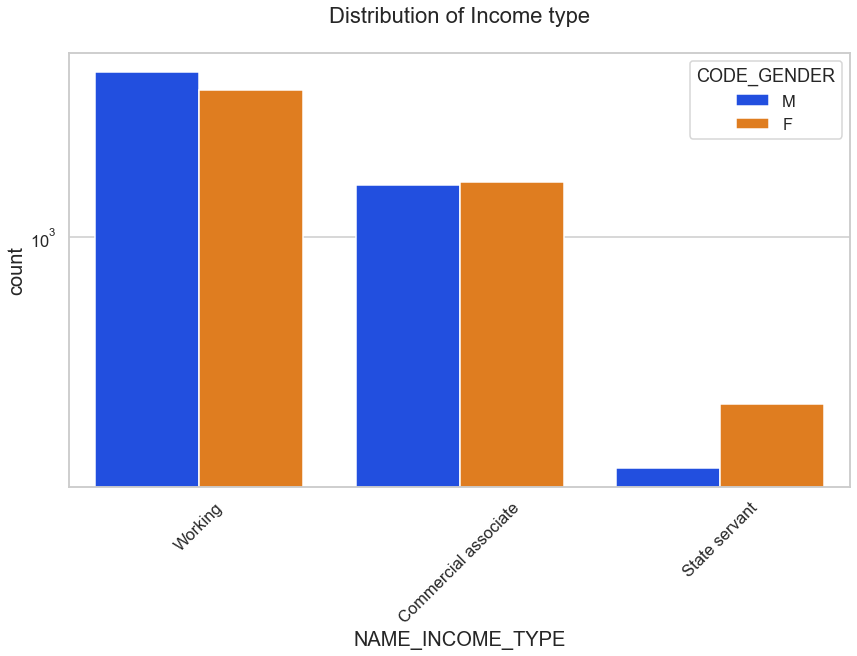

In [60]:
# Plotting for Income type

uniplot(target0_data,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

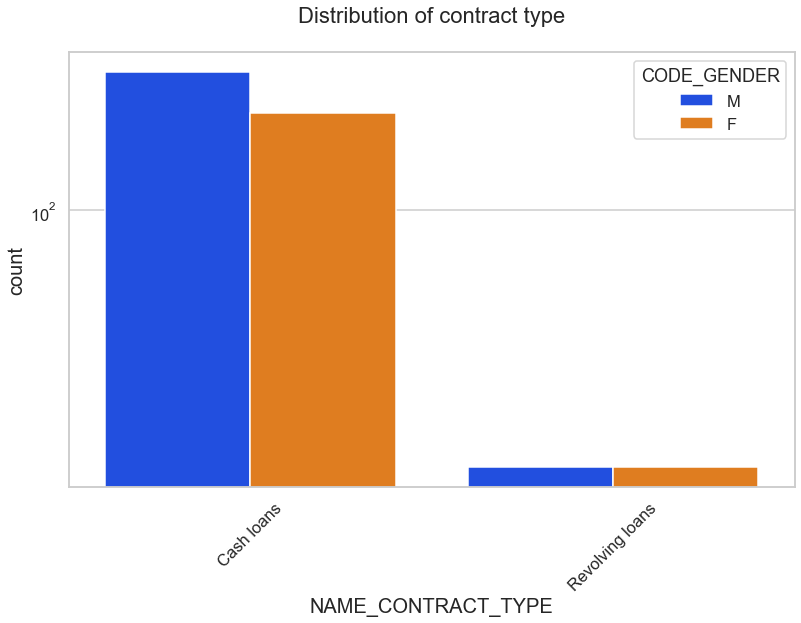

In [58]:
# Plotting for Contract type

uniplot(target1_data,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

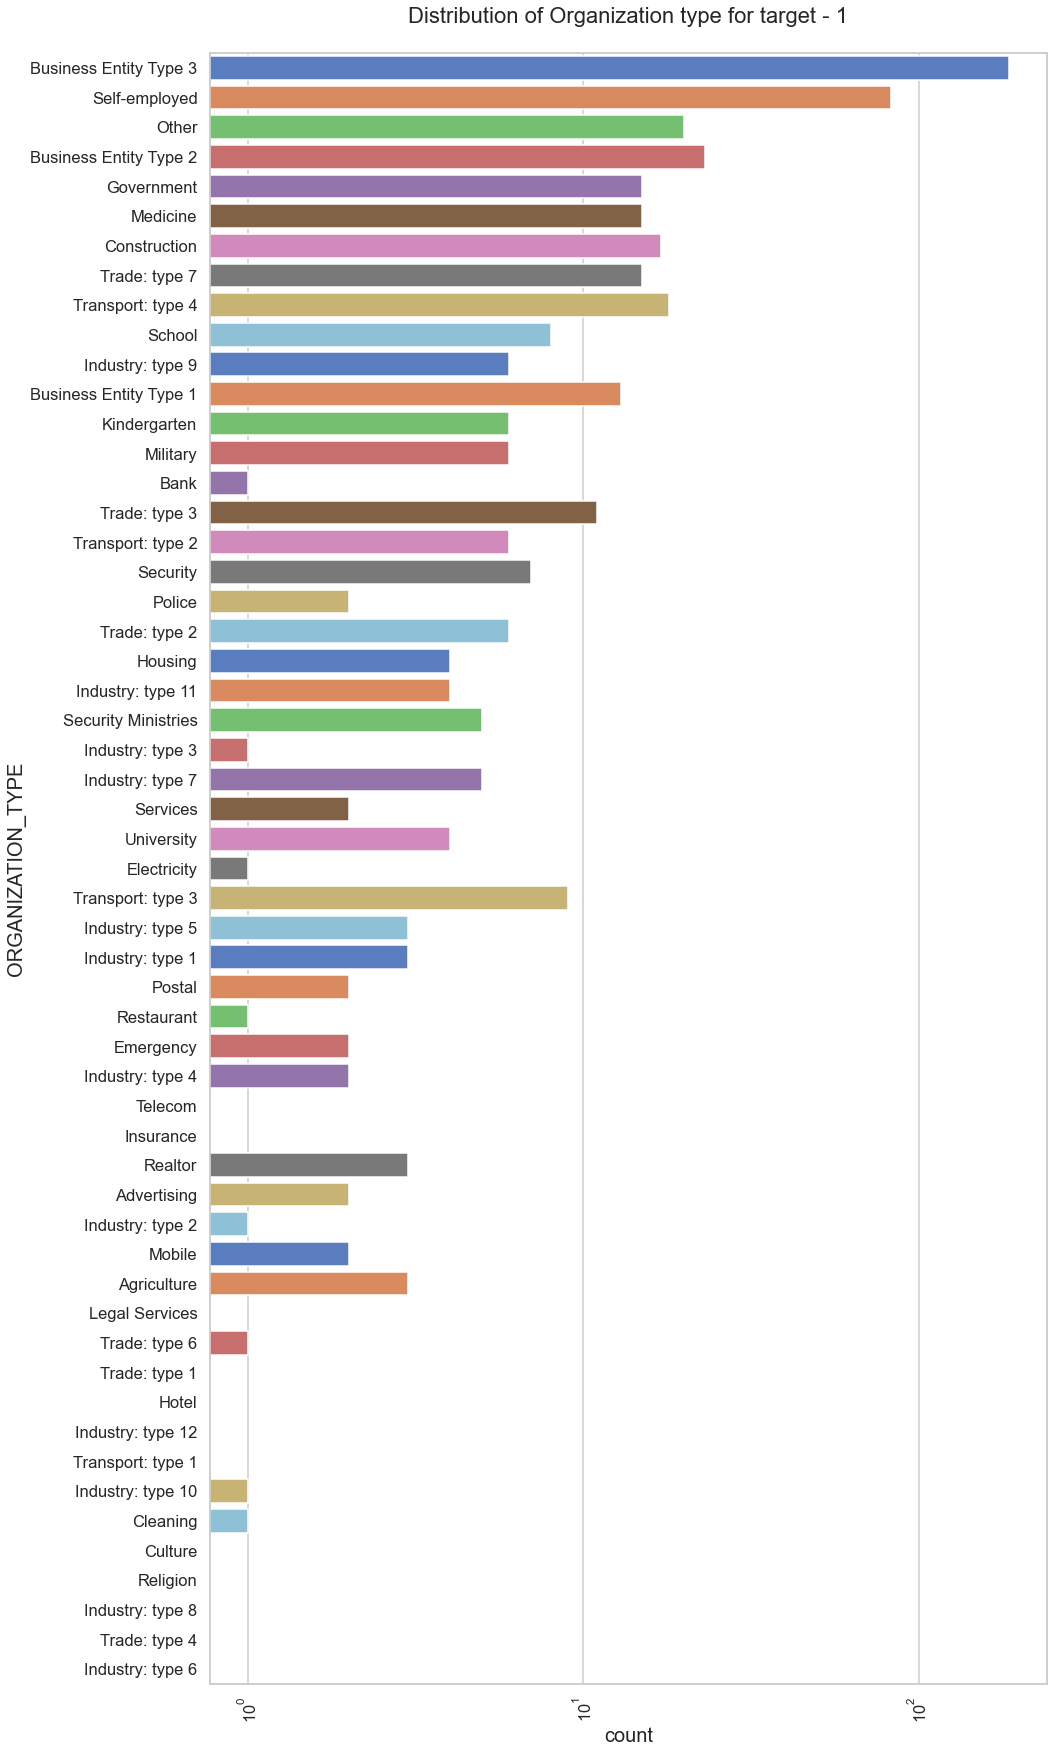

In [61]:
# Plotting for Organization type in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target1_data,y='ORGANIZATION_TYPE',order=target0_data['ORGANIZATION_TYPE'].value_counts().index,palette='muted')

plt.show()

In [37]:
# Finding some correlation for numerical columns for both target 0 and 1 

target0_corr=target0_data.iloc[0:,2:]
target1_corr=target1_data.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

In [38]:
# Correlation for target 0
target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,-0.046057,-0.023697,-0.024275,-0.027201,-0.038570,0.171337,-0.009273,0.136029,-0.128491,...,-0.008835,-0.009862,-0.007135,-0.013465,-0.007787,-0.006621,-0.000436,-0.015429,-0.030927,-0.041606
AMT_INCOME_TOTAL,-0.046057,1.000000,0.390645,0.458734,0.391977,0.134041,-0.133599,-0.066698,0.017466,-0.016813,...,0.007189,0.023195,0.006241,0.003926,0.019130,0.002228,0.012134,0.056291,0.020499,0.033815
AMT_CREDIT,-0.023697,0.390645,1.000000,0.815767,0.986340,0.068731,-0.206174,-0.079763,-0.018476,-0.021056,...,0.035096,0.031841,0.044113,0.001619,0.006160,-0.001945,0.008579,0.060144,0.013222,-0.044617
AMT_ANNUITY,-0.024275,0.458734,0.815767,1.000000,0.814466,0.076904,-0.162437,-0.070335,-0.008189,-0.019053,...,-0.007272,0.024931,0.036375,0.000918,0.017105,0.011787,0.027295,0.046956,0.019621,0.011255
AMT_GOODS_PRICE,-0.027201,0.391977,0.986340,0.814466,1.000000,0.073529,-0.211046,-0.084941,-0.016205,-0.024765,...,0.033479,0.032459,0.044391,0.002012,0.004139,-0.002153,0.010391,0.056220,0.015434,-0.048216
REGION_POPULATION_RELATIVE,-0.038570,0.134041,0.068731,0.076904,0.073529,1.000000,-0.062796,-0.000611,-0.046908,0.045964,...,0.027933,0.003079,-0.014963,-0.001459,-0.001319,-0.008716,-0.006126,0.063680,-0.016496,-0.017730
DAYS_BIRTH,0.171337,-0.133599,-0.206174,-0.162437,-0.211046,-0.062796,1.000000,0.263621,0.208209,0.070652,...,0.019913,-0.004877,-0.002443,0.022465,-0.000632,0.015257,-0.010569,-0.032459,-0.021340,-0.043077
DAYS_EMPLOYED,-0.009273,-0.066698,-0.079763,-0.070335,-0.084941,-0.000611,0.263621,1.000000,0.073390,0.104791,...,0.026435,0.013074,0.022225,-0.003266,-0.003967,0.021793,-0.006956,-0.038862,0.013024,-0.022454
DAYS_REGISTRATION,0.136029,0.017466,-0.018476,-0.008189,-0.016205,-0.046908,0.208209,0.073390,1.000000,0.012091,...,-0.001159,-0.004673,-0.003053,-0.013748,0.007886,-0.000018,-0.006919,-0.012916,0.004440,-0.006227
DAYS_ID_PUBLISH,-0.128491,-0.016813,-0.021056,-0.019053,-0.024765,0.045964,0.070652,0.104791,0.012091,1.000000,...,0.004964,0.009638,0.012695,0.005299,0.004465,-0.010439,-0.014499,-0.024198,-0.003498,-0.009446


In [39]:
# Correlation for target 1
target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,-0.031025,0.019740,0.018172,0.005342,0.065924,0.084037,-0.028344,0.156558,-0.108676,...,0.042365,-0.035367,NaN,NaN,-0.011761,0.065150,0.026749,-0.018021,-0.011106,-0.038379
AMT_INCOME_TOTAL,-0.031025,1.000000,0.393681,0.457895,0.398350,0.074069,-0.156848,0.010691,-0.052912,-0.000631,...,0.061090,-0.018311,NaN,NaN,0.049515,0.033179,-0.021892,0.067820,-0.110911,0.021576
AMT_CREDIT,0.019740,0.393681,1.000000,0.798384,0.974968,-0.015745,-0.233837,-0.077785,0.006683,-0.029784,...,0.045548,0.070283,NaN,NaN,0.016066,0.042862,-0.033426,0.035850,-0.082318,-0.068463
AMT_ANNUITY,0.018172,0.457895,0.798384,1.000000,0.801542,0.033363,-0.120353,-0.104394,0.009714,-0.014634,...,0.011746,0.053893,NaN,NaN,0.065420,0.026293,0.021780,0.032367,-0.055058,-0.052209
AMT_GOODS_PRICE,0.005342,0.398350,0.974968,0.801542,1.000000,-0.005739,-0.236203,-0.087149,0.010837,-0.043959,...,0.042417,0.070468,NaN,NaN,0.032088,0.047645,-0.030611,0.033482,-0.075130,-0.084611
REGION_POPULATION_RELATIVE,0.065924,0.074069,-0.015745,0.033363,-0.005739,1.000000,-0.035998,-0.049038,-0.025450,-0.112817,...,0.052737,-0.047622,NaN,NaN,0.073244,0.000118,0.064504,0.031347,-0.033477,-0.078921
DAYS_BIRTH,0.084037,-0.156848,-0.233837,-0.120353,-0.236203,-0.035998,1.000000,0.246327,0.144694,0.214987,...,-0.003603,0.068264,NaN,NaN,0.061613,0.056181,0.079930,-0.023420,0.026497,-0.103140
DAYS_EMPLOYED,-0.028344,0.010691,-0.077785,-0.104394,-0.087149,-0.049038,0.246327,1.000000,0.072726,0.045723,...,0.069541,0.063090,NaN,NaN,0.007097,0.043035,0.058174,0.002449,0.090895,-0.038210
DAYS_REGISTRATION,0.156558,-0.052912,0.006683,0.009714,0.010837,-0.025450,0.144694,0.072726,1.000000,-0.004528,...,0.019241,-0.009629,NaN,NaN,0.072839,0.010788,0.015293,-0.055027,0.073469,-0.052059
DAYS_ID_PUBLISH,-0.108676,-0.000631,-0.029784,-0.014634,-0.043959,-0.112817,0.214987,0.045723,-0.004528,1.000000,...,-0.036464,0.053892,NaN,NaN,0.102517,-0.013913,0.001857,-0.013202,-0.013946,0.035000


### Bivariate analysis for numerical variables

### For Target 0

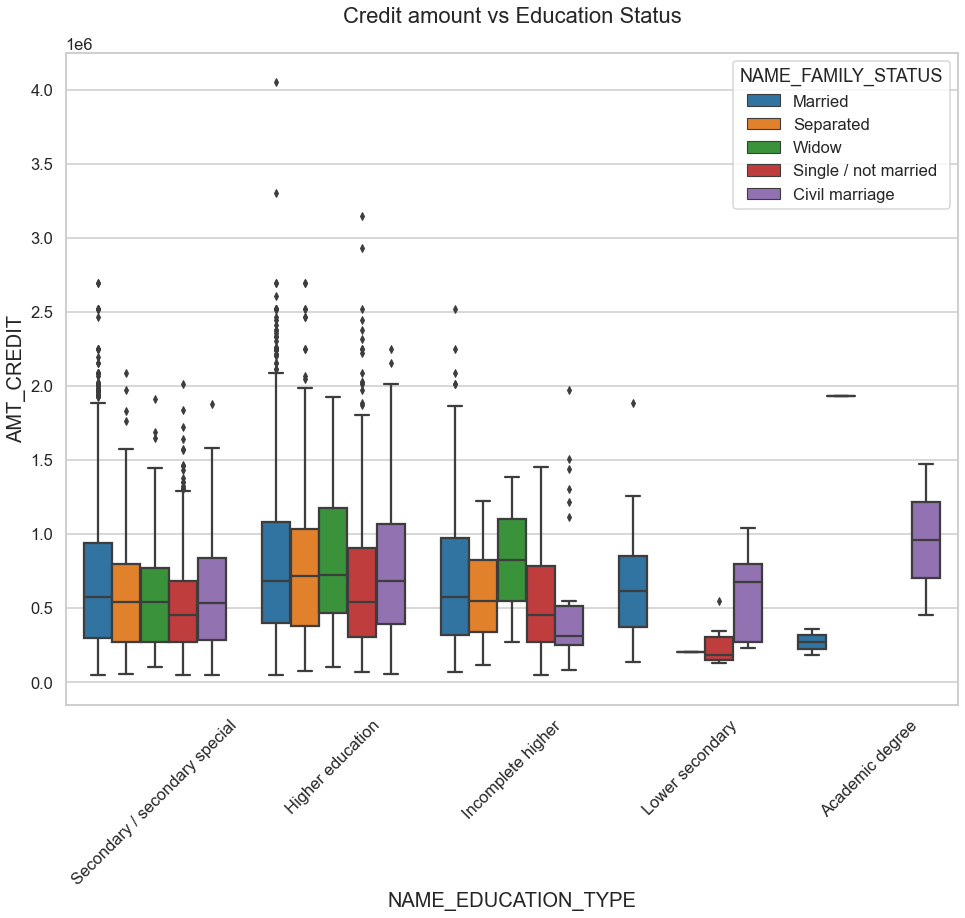

In [40]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_data, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

### 

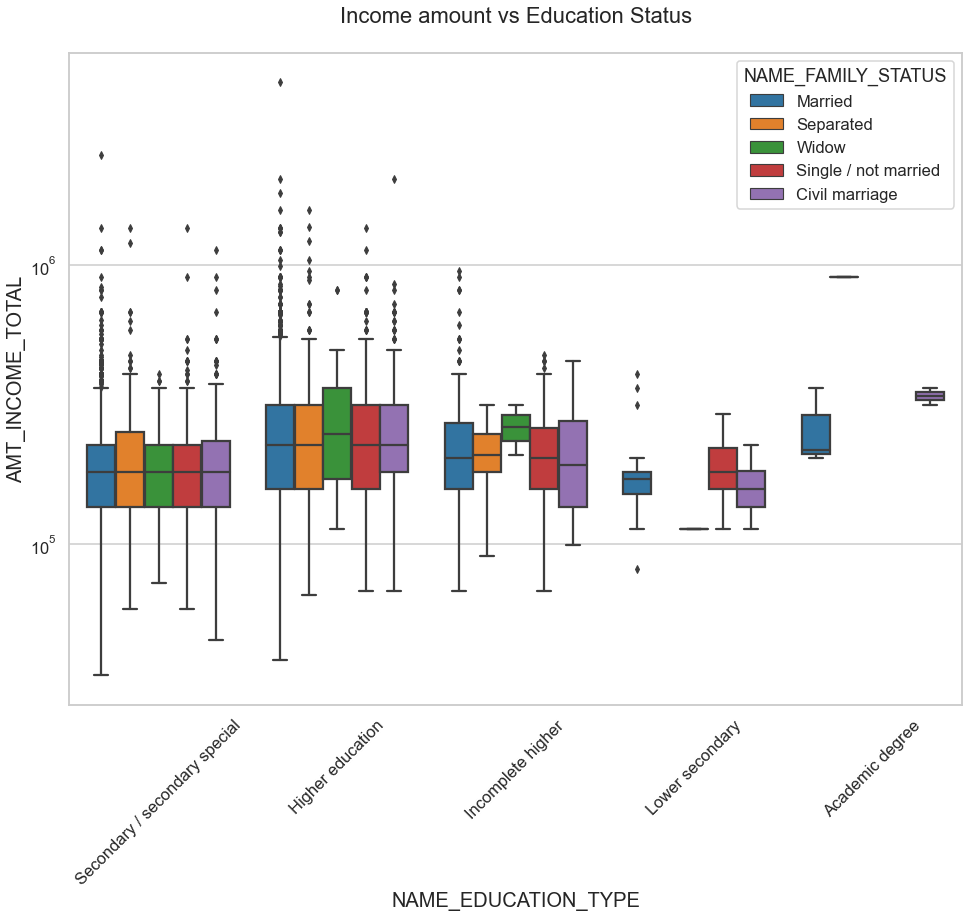

In [41]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_data, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

### For Target 1

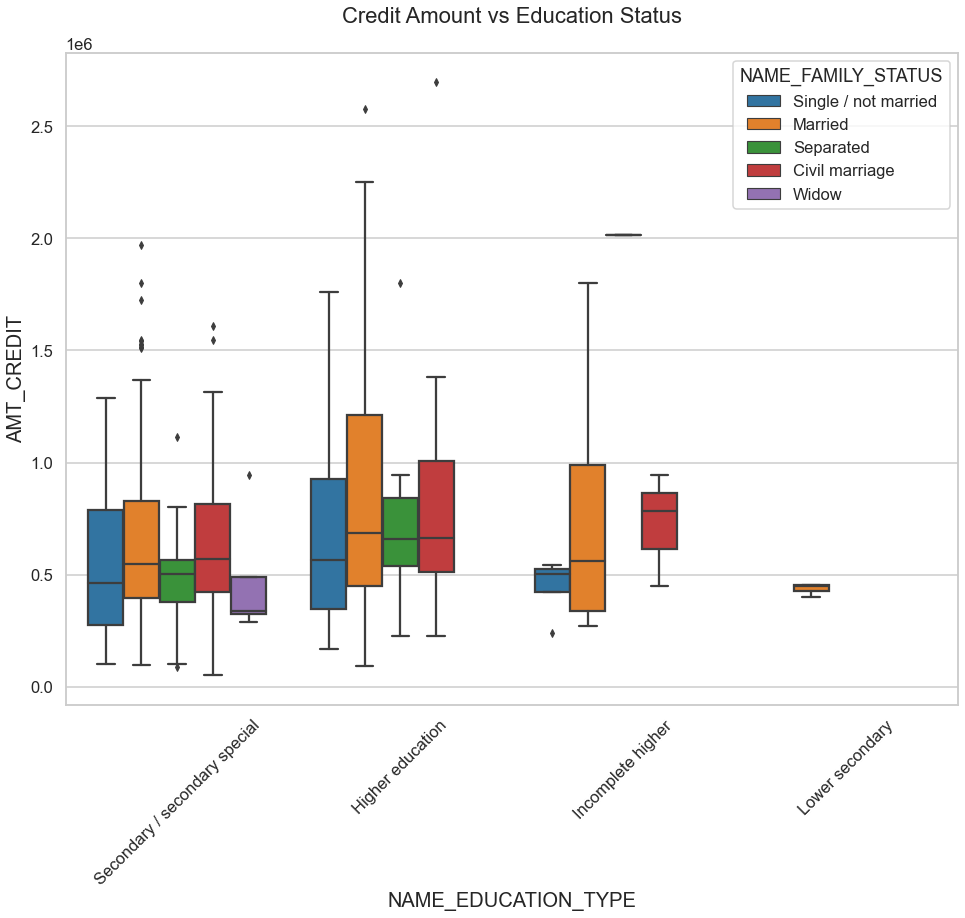

In [63]:
# Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target1_data, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

### 

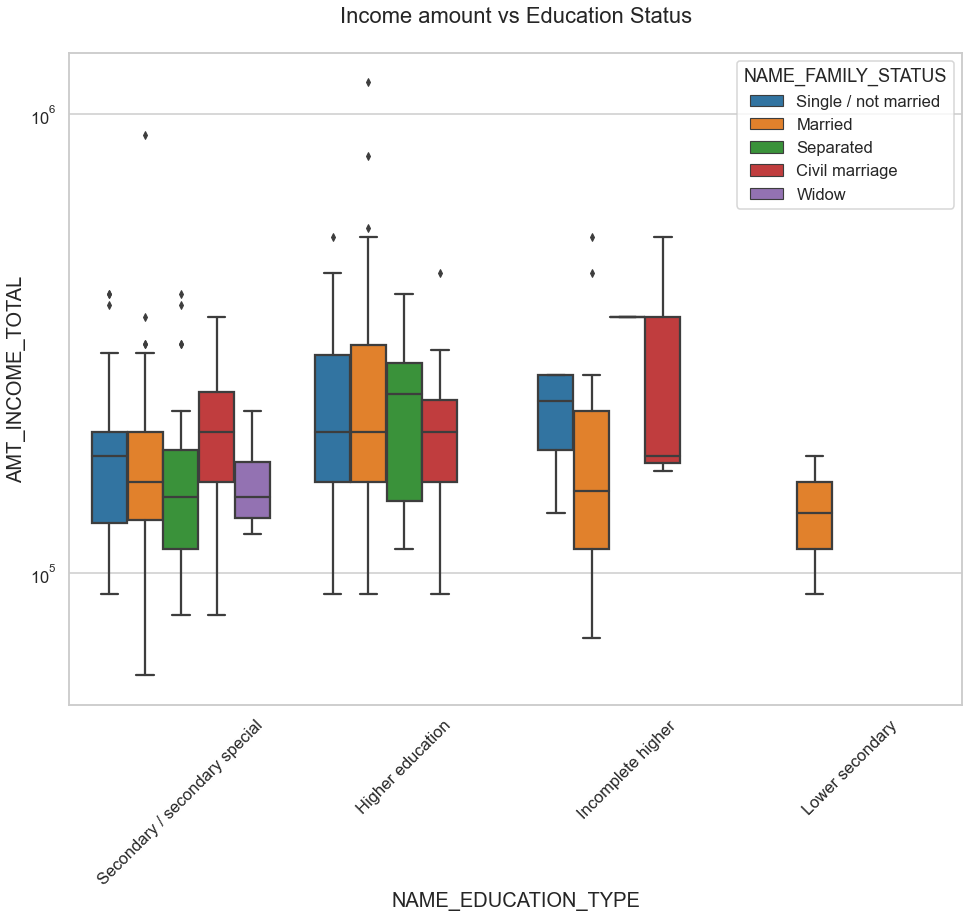

In [62]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1_data, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

### 

### Dataset Info : previous_application.csv

In [44]:
# reading the application dataset first
prev_data = pd.read_csv('previous_application.csv')

In [45]:
# Cleaning the missing data

# listing the null values columns having more than 30%
emptycol1=prev_data.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)

15

In [46]:
# Removing those 15 columns
emptycol1 = list(emptycol1[emptycol1.values>=0.3].index)
prev_data.drop(labels=emptycol1,axis=1,inplace=True)

In [47]:
prev_data.shape

(1670214, 22)

In [48]:
# Removing the column values of 'XNA' and 'XAP'
prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

prev_data.shape

(69635, 22)

### Merging the application dataset with the previous application dataset

In [49]:
# Now merging the Application dataset with previous appliaction dataset
new_data=pd.merge(left=cred_data2,right=prev_data,how='inner',on='SK_ID_CURR',suffixes='_x')

C:\Anaconda\envs\rstudio\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  


In [50]:
# Renaming the column names after merging
new_data1 = new_data.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [51]:
# Removing unwanted columns for analysis

new_data1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

### Perform Univariate Analysis on the final merged dataset

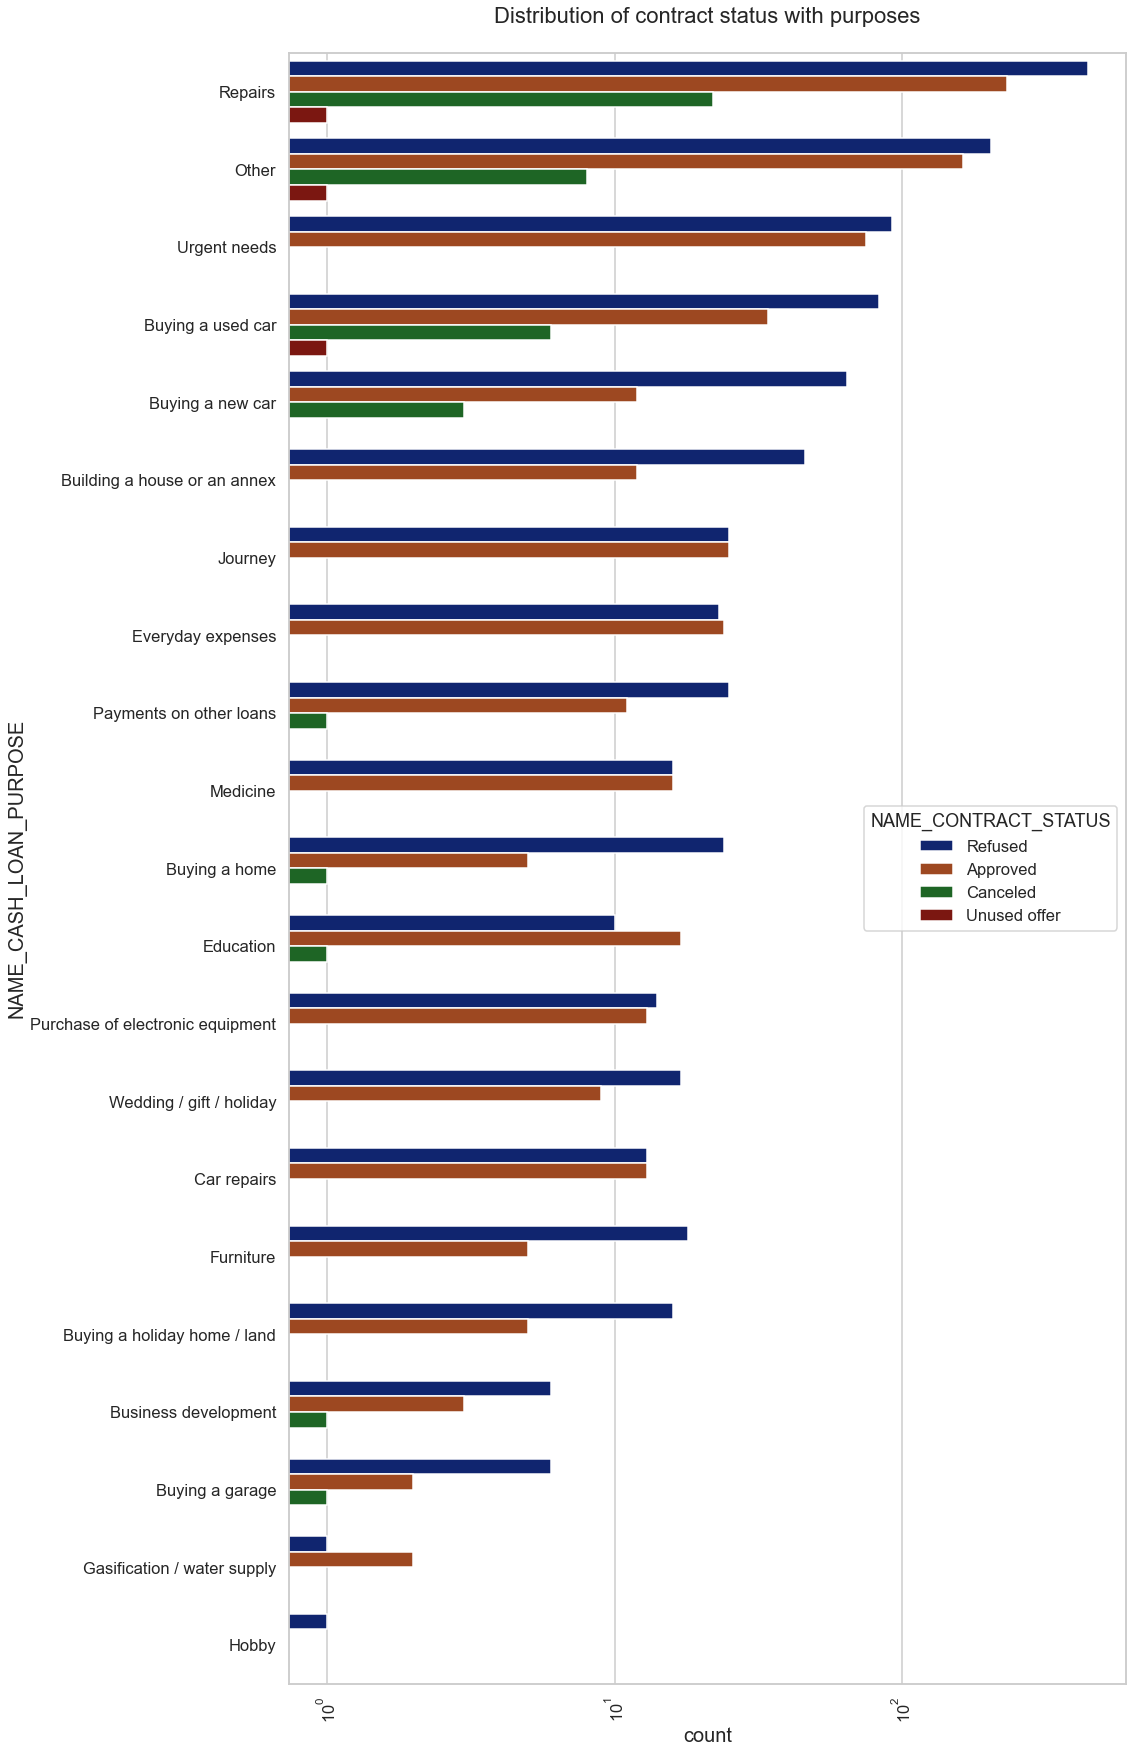

In [52]:

# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_data1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_data1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='dark')

Points to be concluded from above plot:

1. Most rejection of loans came from purpose 'repairs'.
2. For journey purposes we have equal number of approves and rejection
3. buying a new car, buying a home, buying a garage and furniture is having significant higher rejection than approves.
4. Repairs has the most number of cancelled contracts
5. Only Repairs, Others and buying a used car have unused offer contracts 

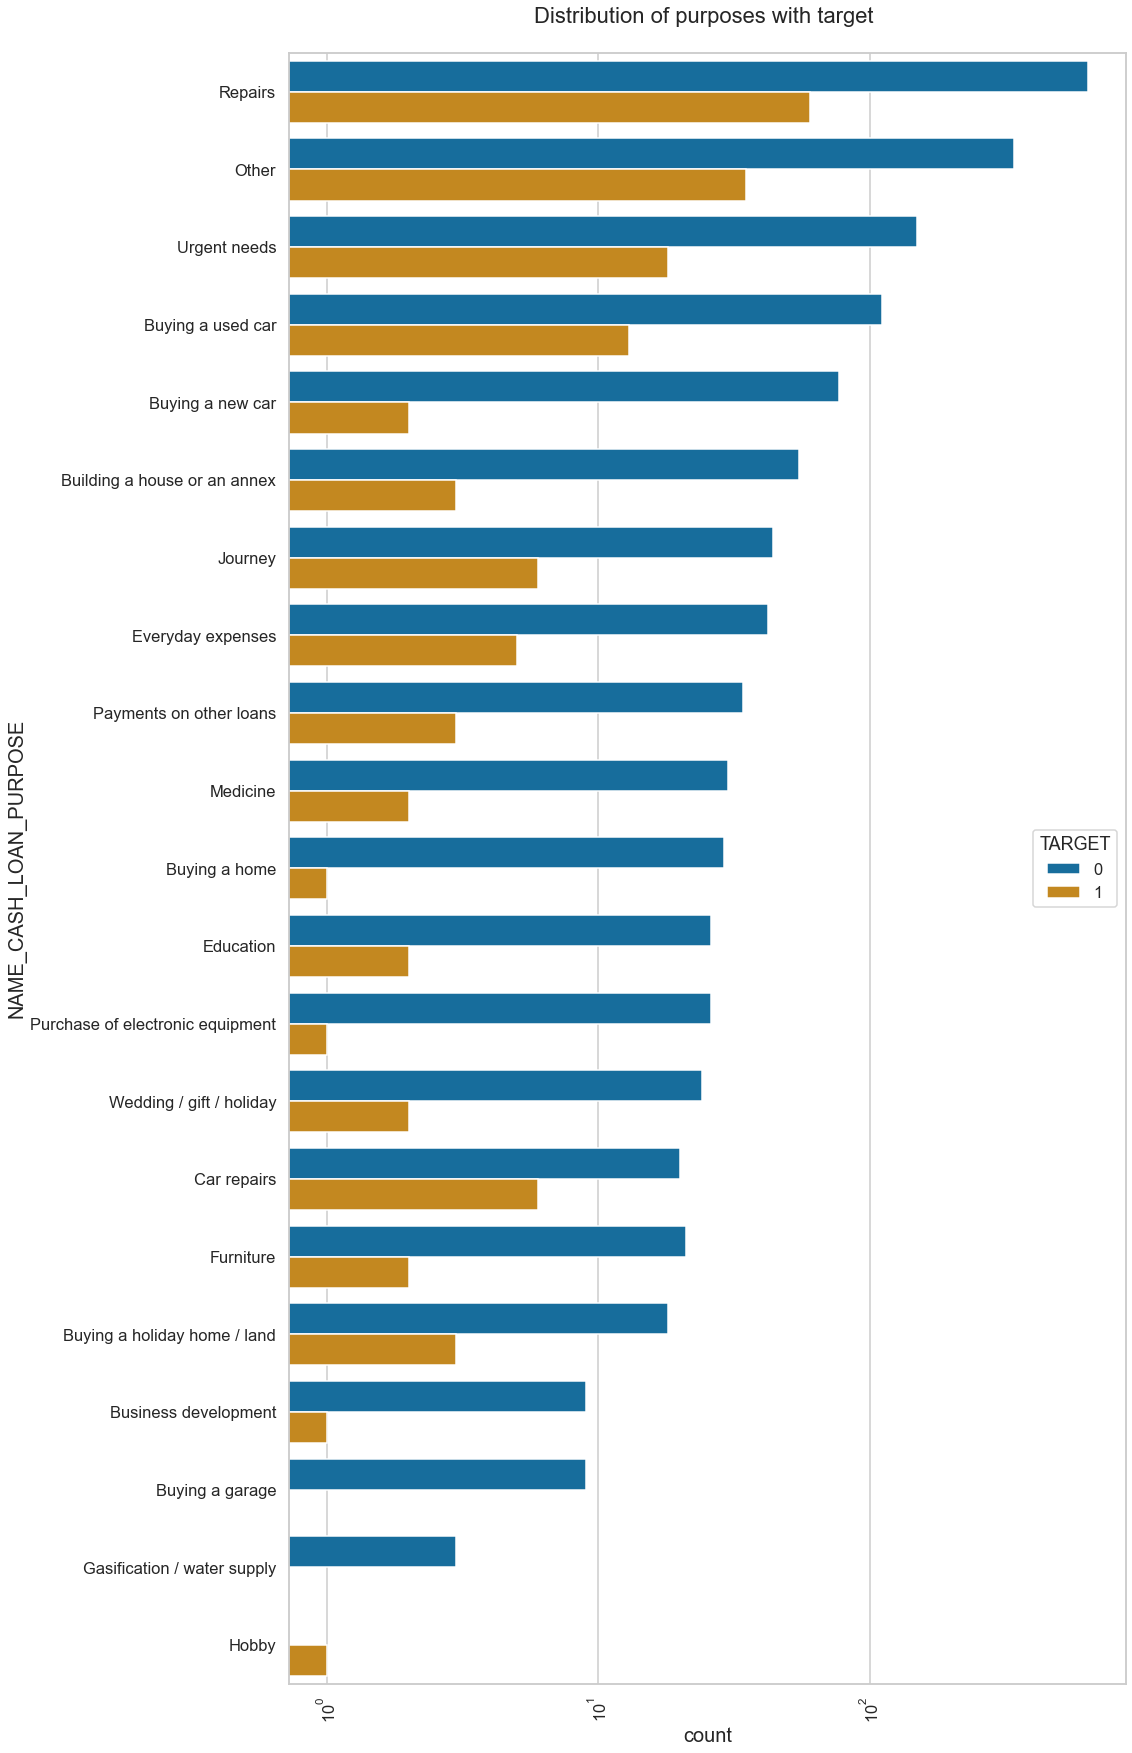

In [53]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_data1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_data1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='colorblind')

Few points we can conclude from above plot:

1. Loan purposes with 'Repairs' are facing more difficulites in payment on time.
2. There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage','Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

### Perform Bivariate Analysis on the final merged dataset

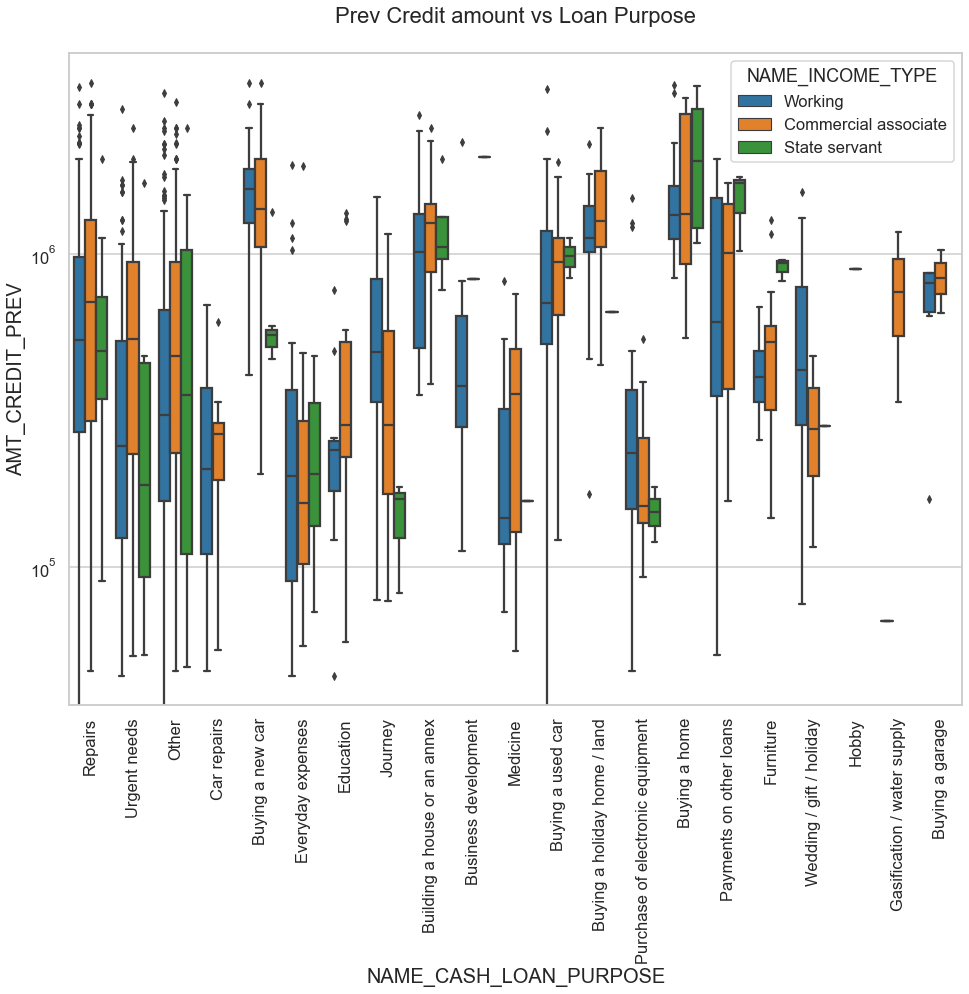

In [54]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_data1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

From the above we can conclude some points-

1. The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
2. Income type of working have a significant amount of credit applied. Next to working category is the commercial associate income type.
3. Income type of Hobby is having the lowest credits applied for.

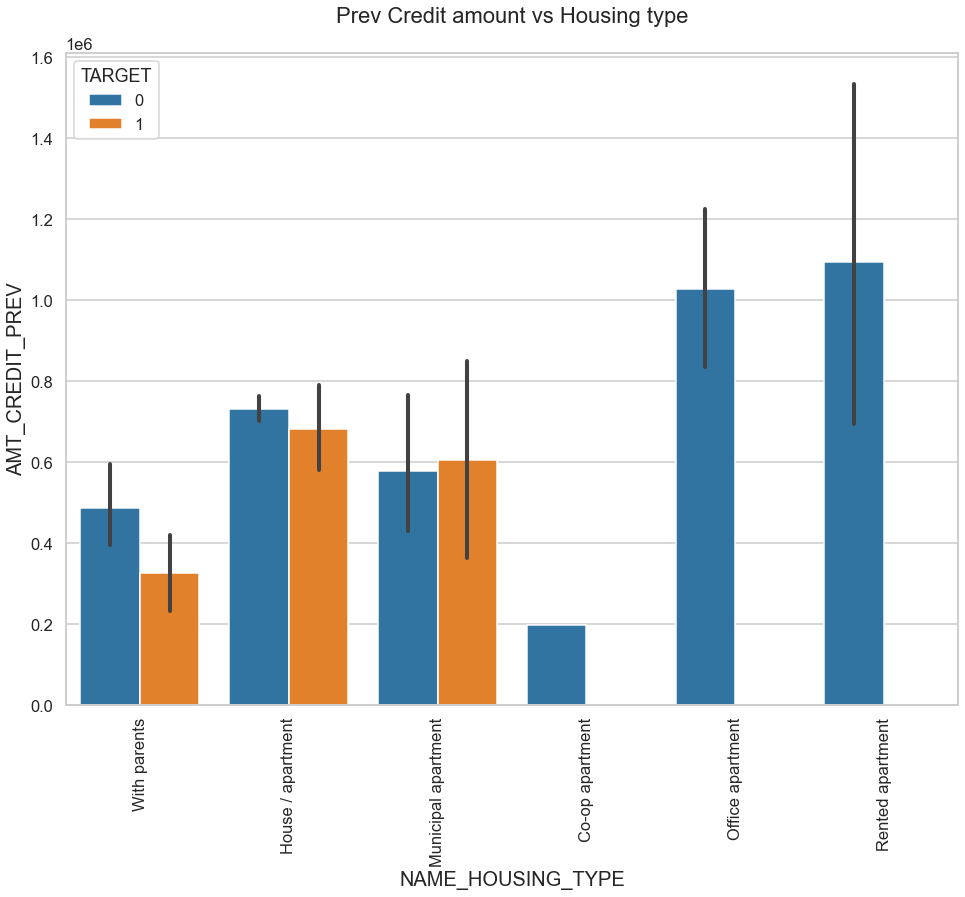

In [55]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_data1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Points to note from above bar plot :

1. Here for Rented apartment and Office apartment is having higher credit of target 0. These housing types are less likely to default.
2. House\apartment and Municipal apartment is having higher credit of target 1.These housing types are more likely to default.
**So, we can conclude that bank should avoid giving loans to the housing type of House\apartment and Municipal apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents, Rented apartment and Office apartment for successful payments.**

## CONCLUSION 
1. Banks should focus more on contract type ‘Businessman’, 'Student', 'Government','Medicine' with housing ‘type for successful payments.

2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.

3. The loan purpose 'Repairs', ‘Urgent needs’ and 'Other' is having higher number of unsuccessful payments on time.

4. Get as much as clients from housing type ‘Office apartment’ and 'Rented apartment' as they are having least number of unsuccessful payments.